## Linear Regression

如果我們有數據 (x, y) ，假設 x 是年資、y 是薪資，我們想找出其中的關聯 w 和 b  (y = w * x + b)

我們就可以依照這些數據繪製出一條線，來描述這些數據

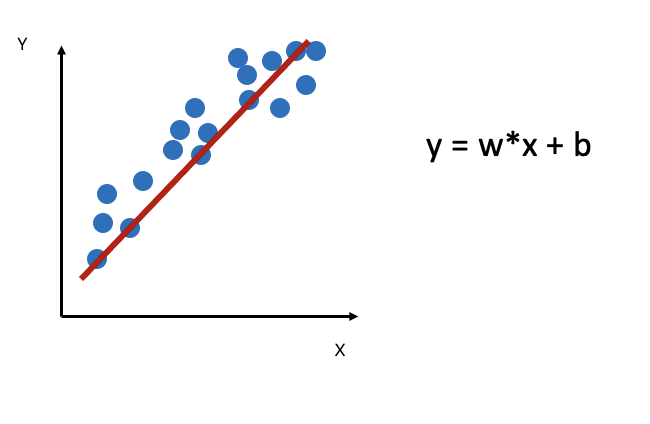

而這些線是我們透過學習找到一個最小 error 去擬合訓練資料

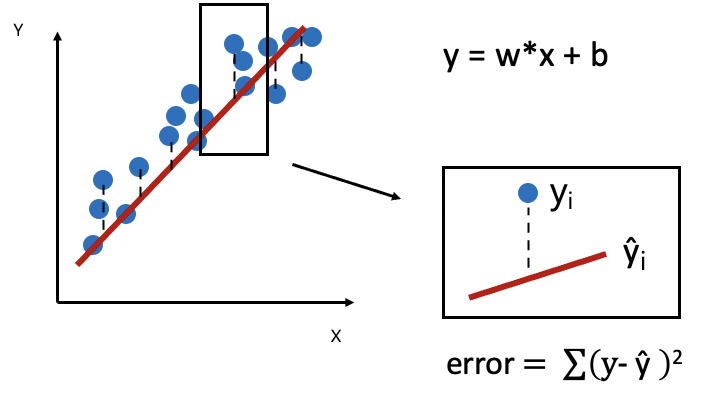

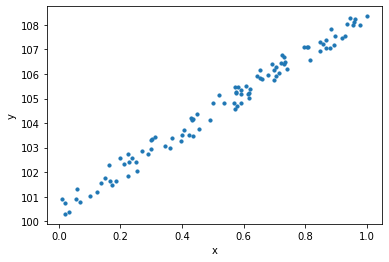

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 我們自己產資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = np.random.rand(100, 1)
y = 8 * x + 100 + noise
# plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
# 建立LinearRegression模型
linearMmodel = LinearRegression(fit_intercept=True)
# 使用訓練資料訓練模型
linearMmodel.fit(x, y)
# 使用訓練資料預測
predicted = linearMmodel.predict(x)

In [4]:
from sklearn import metrics
print('R2 score: ', linearMmodel.score(x, y))
mse = metrics.mean_squared_error(y, predicted)
print('MSE score: ', mse)

R2 score:  0.9831081424561687
MSE score:  0.08275457812228725


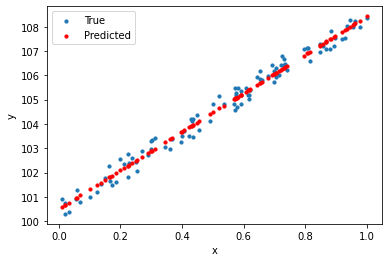

In [5]:
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
# 模型的斜率及截距
# 分別儲存在linearMmodel.coef_[0] 和 linearMmodel.intercept_中
coef = linearMmodel.coef_ 
intercept = linearMmodel.intercept_

print("斜率w = ", coef[0][0])
print("截距b = ", intercept[0])

斜率w =  7.931123354540897
截距b =  100.50916633941445


### 課堂練習
利用 Salary_Data.csv 建立一個簡單迴歸模型

## Logistic Regression

 雖然跟這裡探討的是迴歸模型，但是大家必須釐清一點的是羅吉斯迴歸是應用在分類問題
 
 用以下表格來說明
 
| 模型名稱  |  預測標籤  | 應用場景   | 公式 | 
| -------- | -------- | --------        | ---- | 
| 線性迴歸  |  數值     | 適用於預測數值型，例如預測物價指數  | $$\sum_\limits{i}({w}_i{x}_i + b)$$ |
| 羅吉斯迴歸 | 介於0到1的機率、布林值| 適用於二元分類，例如吸菸是否會得到癌症的機率、信用卡評分模型等等 | $$\sigma(\sum_\limits{i}({w}_i{x}_i + b))$$| 

介紹羅吉斯背後的原理前，我們需要先了解「勝算比」(odds radio)是什麼，它是指對特定事件出現的比率。

公式是：$$ 勝算比 = \dfrac{P}{1-P}$$

P表示「正事件」發生的機率，然而正事件不一定代表是好事情，也可以指的是出現癌症的事件

羅吉斯回歸的公式：$$ln(\dfrac{P}{1-P})={w}_0{x}_0 + {w}_1{x}_1 + ... + {w}_m{x}_m = \sum({w}_m{x}_m) = z$$
其中 sigmoid 的函數為：$$\sigma(z)=\dfrac{1}{1+e^{-z}}$$

我們利用線性迴歸輸出的結果來進行二元分類(輸出大於0.5分到1、小於0.5就分到0)

[圖片來源網址](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)

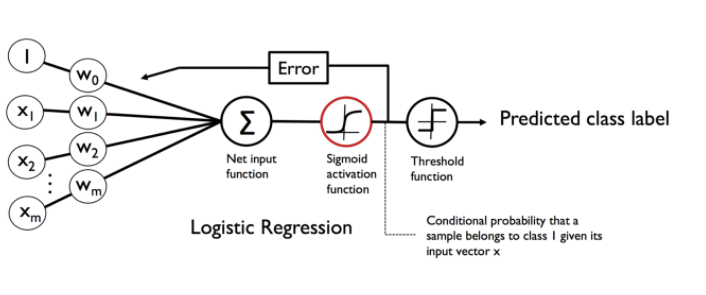

- 優點：
  - 不需要假設分配類型
  - 快速可以得到結果
  - 了解各類別的分類機率
- 缺點：
  - 無法解決非線性問題
  - 不太能處理大量的特徵，容易造成過度擬合

### Sigmoid 函數

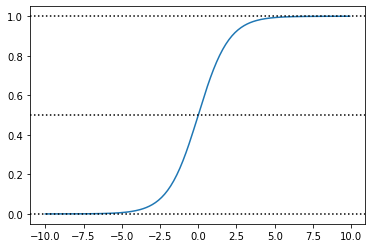

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axhline(y=1, ls='dotted', color='black')
plt.axhline(y=0.5, ls='dotted', color='black')
plt.axhline(y=0, ls='dotted', color='black')
plt.show()

### 實作羅吉斯迴歸模型

In [22]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [23]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [26]:
X = iris_df.drop(labels=['target_name', 'target'] ,axis=1)
y = iris_df['target'].values

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [39]:
# 預測成功的比例
print('訓練集: ', classifier.score(X_train,y_train))
print('測試集: ', classifier.score(X_test,y_test))

訓練集:  0.9642857142857143
測試集:  1.0


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


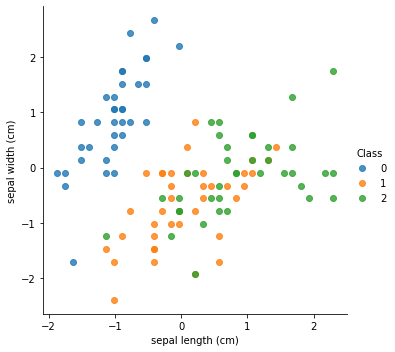

In [51]:
# 先看真實資料集
import seaborn as sns
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_test['Class']=y_test
sns.lmplot('sepal length (cm)', 'sepal width (cm)', hue='Class', data=df_train, fit_reg=False)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


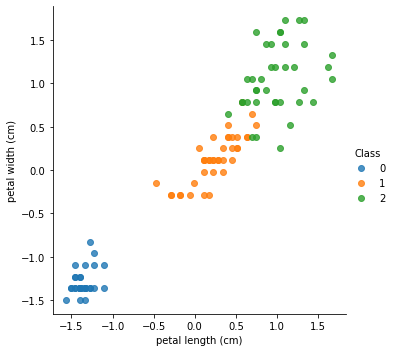

In [52]:
# 先看真實資料集
import seaborn as sns
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_test['Class']=y_test
sns.lmplot('petal length (cm)', 'petal width (cm)', hue='Class', data=df_train, fit_reg=False)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


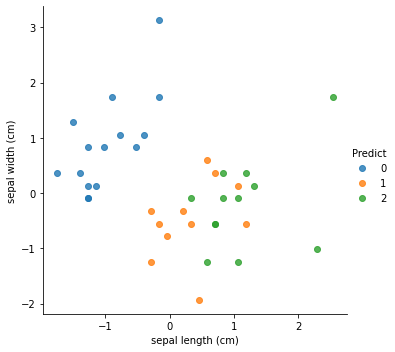

In [49]:
# 測試集預測結果
df_test['Predict'] = y_pred
sns.lmplot('sepal length (cm)', 'sepal width (cm)', data=df_test, hue="Predict", fit_reg=False)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


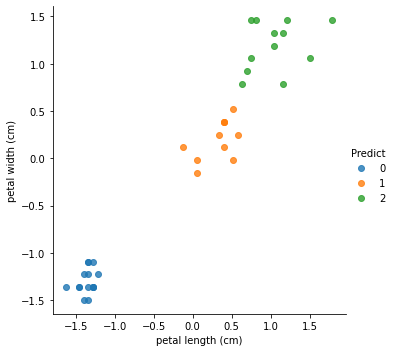

In [53]:
# 測試集預測結果
df_test['Predict'] = y_pred
sns.lmplot('petal length (cm)', 'petal width (cm)', data=df_test, hue="Predict", fit_reg=False)
plt.show()